In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer 

In [3]:
df=pd.read_csv('ev_battery_charging_data.csv')
df

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Charging Mode,Efficiency (%),Battery Type,Charging Cycles,EV Model,Optimal Charging Duration Class
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,Fast,98.238981,Li-ion,112,Model B,1
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,Fast,97.562628,LiFePO4,398,Model A,1
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,Slow,97.233533,LiFePO4,175,Model A,2
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,Fast,98.136225,LiFePO4,150,Model B,1
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,Fast,97.662485,Li-ion,886,Model C,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18.242387,3.959869,87.876618,28.842141,32.947946,88.443536,9.724521,Normal,98.055096,LiFePO4,236,Model C,2
996,92.558222,4.169630,24.154589,26.688024,17.387620,70.322041,11.822482,Normal,97.635504,LiFePO4,957,Model A,1
997,22.313677,3.548271,37.880907,27.891446,21.556857,96.514885,10.553163,Fast,97.889367,LiFePO4,997,Model C,2
998,95.521362,3.539938,36.104098,30.598812,31.314908,68.529063,12.016764,Normal,97.596647,LiFePO4,435,Model B,1


In [4]:
df.head()

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Charging Mode,Efficiency (%),Battery Type,Charging Cycles,EV Model,Optimal Charging Duration Class
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,Fast,98.238981,Li-ion,112,Model B,1
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,Fast,97.562628,LiFePO4,398,Model A,1
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,Slow,97.233533,LiFePO4,175,Model A,2
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,Fast,98.136225,LiFePO4,150,Model B,1
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,Fast,97.662485,Li-ion,886,Model C,2


In [5]:
df.tail()

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Charging Mode,Efficiency (%),Battery Type,Charging Cycles,EV Model,Optimal Charging Duration Class
995,18.242387,3.959869,87.876618,28.842141,32.947946,88.443536,9.724521,Normal,98.055096,LiFePO4,236,Model C,2
996,92.558222,4.169630,24.154589,26.688024,17.387620,70.322041,11.822482,Normal,97.635504,LiFePO4,957,Model A,1
997,22.313677,3.548271,37.880907,27.891446,21.556857,96.514885,10.553163,Fast,97.889367,LiFePO4,997,Model C,2
998,95.521362,3.539938,36.104098,30.598812,31.314908,68.529063,12.016764,Normal,97.596647,LiFePO4,435,Model B,1
999,50.140520,3.697531,88.427263,23.227347,26.946248,34.938164,6.579907,Normal,98.684019,Li-ion,706,Model C,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Voltage (V)                      1000 non-null   float64
 2   Current (A)                      1000 non-null   float64
 3   Battery Temp (°C)                1000 non-null   float64
 4   Ambient Temp (°C)                1000 non-null   float64
 5   Charging Duration (min)          1000 non-null   float64
 6   Degradation Rate (%)             1000 non-null   float64
 7   Charging Mode                    1000 non-null   object 
 8   Efficiency (%)                   1000 non-null   float64
 9   Battery Type                     1000 non-null   object 
 10  Charging Cycles                  1000 non-null   int64  
 11  EV Model                         1000 non-null   object 
 12  Optimal Charging Dura

In [7]:
df.isnull().sum()

SOC (%)                            0
Voltage (V)                        0
Current (A)                        0
Battery Temp (°C)                  0
Ambient Temp (°C)                  0
Charging Duration (min)            0
Degradation Rate (%)               0
Charging Mode                      0
Efficiency (%)                     0
Battery Type                       0
Charging Cycles                    0
EV Model                           0
Optimal Charging Duration Class    0
dtype: int64

In [8]:
df.shape

(1000, 13)

In [9]:
df.count()

SOC (%)                            1000
Voltage (V)                        1000
Current (A)                        1000
Battery Temp (°C)                  1000
Ambient Temp (°C)                  1000
Charging Duration (min)            1000
Degradation Rate (%)               1000
Charging Mode                      1000
Efficiency (%)                     1000
Battery Type                       1000
Charging Cycles                    1000
EV Model                           1000
Optimal Charging Duration Class    1000
dtype: int64

In [10]:
df.dtypes

SOC (%)                            float64
Voltage (V)                        float64
Current (A)                        float64
Battery Temp (°C)                  float64
Ambient Temp (°C)                  float64
Charging Duration (min)            float64
Degradation Rate (%)               float64
Charging Mode                       object
Efficiency (%)                     float64
Battery Type                        object
Charging Cycles                      int64
EV Model                            object
Optimal Charging Duration Class      int64
dtype: object

In [11]:
df.describe()

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Efficiency (%),Charging Cycles,Optimal Charging Duration Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,54.123090,3.854912,55.216515,29.807501,24.882106,69.846449,10.017067,97.996587,556.560000,1.194000
std,26.292363,0.204533,26.160678,5.729787,5.736199,28.919481,2.697141,0.539428,263.763052,0.747611
min,10.416882,3.502253,10.001047,20.013068,15.000614,20.618382,4.102433,96.791442,101.000000,0.000000
25%,31.237594,3.668752,33.521588,24.838015,19.899480,44.938000,8.010985,97.585509,317.750000,1.000000
50%,54.712664,3.863114,55.055253,29.685586,24.891962,69.040282,10.027301,97.994540,571.000000,1.000000
75%,76.988763,4.032326,78.319317,34.750816,29.799869,93.985178,12.072456,98.397803,786.000000,2.000000
max,99.974591,4.199590,99.803877,39.991154,34.954988,119.935030,16.042788,99.179513,999.000000,2.000000


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SOC (%),1000.0,54.123090,26.292363,10.416882,31.237594,54.712664,76.988763,99.974591
Voltage (V),1000.0,3.854912,0.204533,3.502253,3.668752,3.863114,4.032326,4.199590
Current (A),1000.0,55.216515,26.160678,10.001047,33.521588,55.055253,78.319317,99.803877
Battery Temp (°C),1000.0,29.807501,5.729787,20.013068,24.838015,29.685586,34.750816,39.991154
Ambient Temp (°C),1000.0,24.882106,5.736199,15.000614,19.899480,24.891962,29.799869,34.954988
Charging Duration (min),1000.0,69.846449,28.919481,20.618382,44.938000,69.040282,93.985178,119.935030
Degradation Rate (%),1000.0,10.017067,2.697141,4.102433,8.010985,10.027301,12.072456,16.042788
Efficiency (%),1000.0,97.996587,0.539428,96.791442,97.585509,97.994540,98.397803,99.179513
Charging Cycles,1000.0,556.560000,263.763052,101.000000,317.750000,571.000000,786.000000,999.000000
Optimal Charging Duration Class,1000.0,1.194000,0.747611,0.000000,1.000000,1.000000,2.000000,2.000000


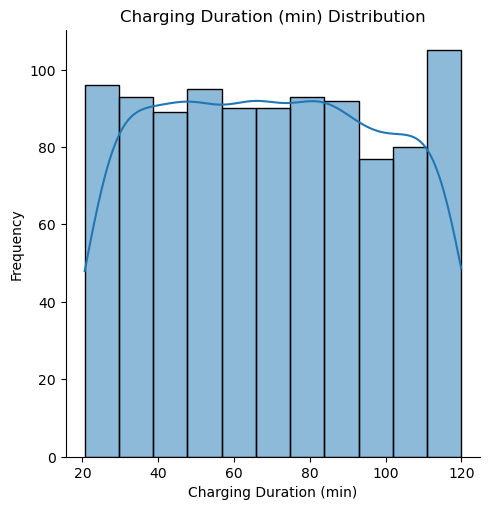

In [13]:
sns.displot(df['Charging Duration (min)'], kde=True)
plt.title("Charging Duration (min) Distribution")
plt.xlabel("Charging Duration (min)")
plt.ylabel("Frequency")
plt.show()

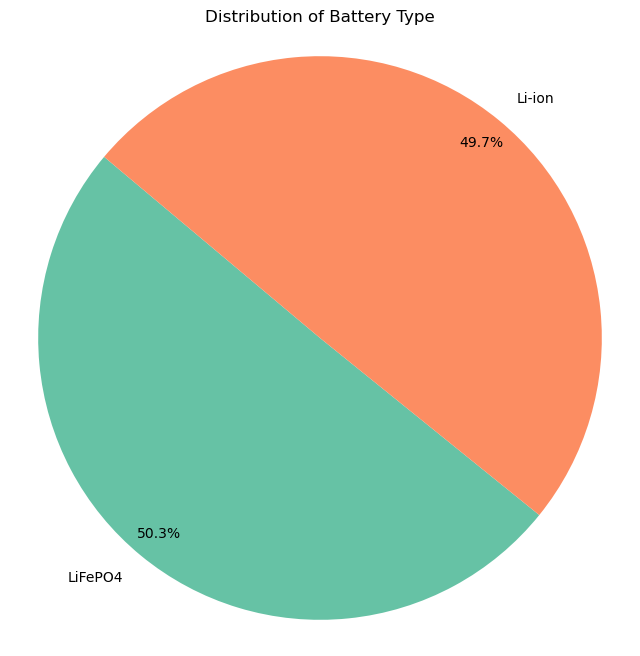

In [14]:
Battery_types_counts = df['Battery Type'].value_counts()

# creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(Battery_types_counts, 
        labels=Battery_types_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette("Set2", len(Battery_types_counts)),
        pctdistance=0.90)  #Increasing even more the distance of the percentages

plt.title('Distribution of Battery Type')
plt.axis('equal')  # ensure the pie chart is circular
plt.show()

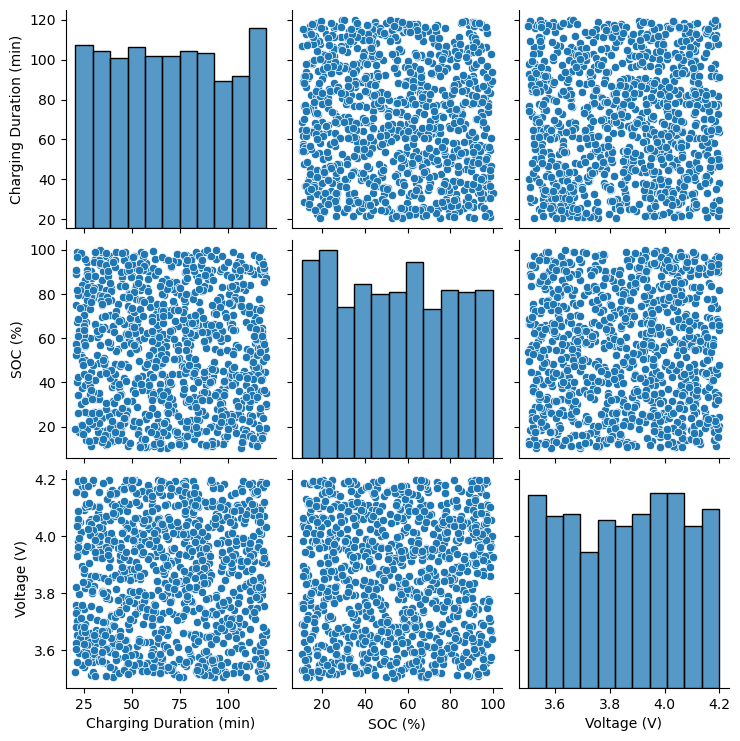

In [15]:
sns.pairplot(df[['Charging Duration (min)', 'SOC (%)', 'Voltage (V)']])
plt.show()

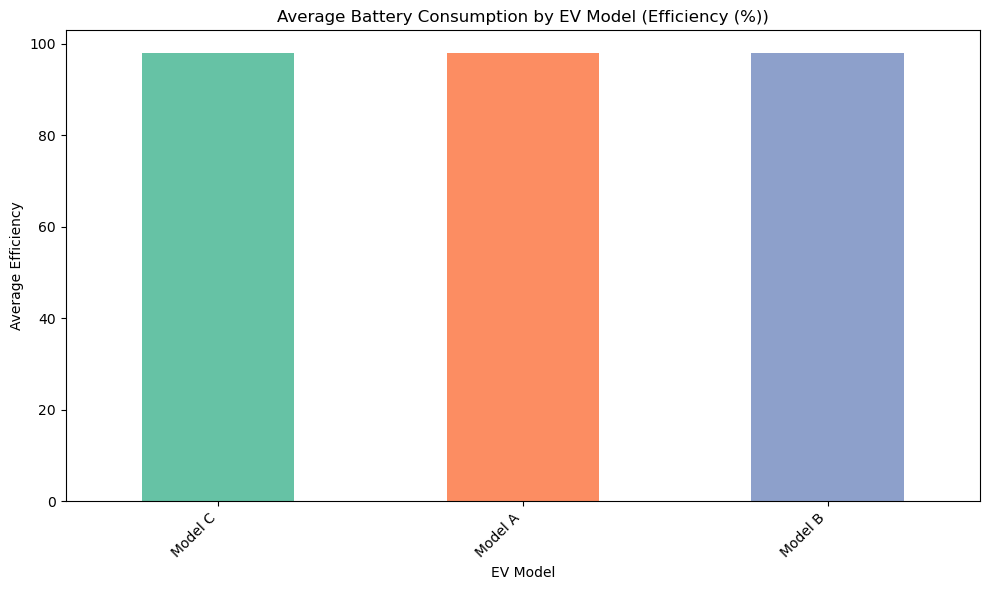

In [16]:
eff = df.groupby('EV Model')['Efficiency (%)'].mean().sort_values(ascending=False)

# creating bar chart
plt.figure(figsize=(10, 6))
eff.plot(kind='bar', color=sns.color_palette("Set2", len(eff)))
plt.title('Average Battery Consumption by EV Model (Efficiency (%))')
plt.xlabel('EV Model')
plt.ylabel('Average Efficiency')
plt.xticks(rotation=45, ha='right')  # rotating the x labels 
plt.tight_layout()  # adjusting the layout
plt.show()

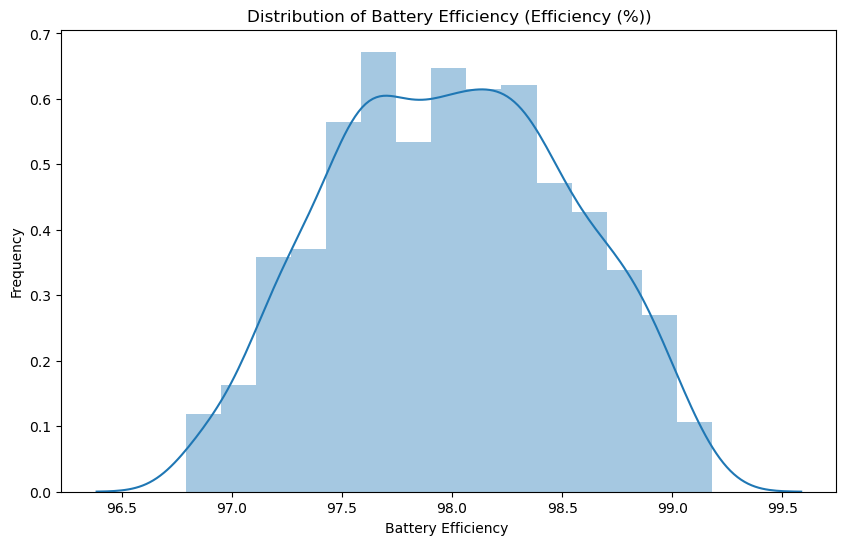

In [17]:
# visualization of combination_mpg
plt.figure(figsize=(10, 6))
sns.distplot(df['Efficiency (%)'].dropna(), kde=True)  # For visualizing the distribution of 'combination_mpg'
plt.title('Distribution of Battery Efficiency (Efficiency (%))')
plt.xlabel('Battery Efficiency ')
plt.ylabel('Frequency')
plt.show()

In [20]:
# encoding categorical variable
label_encoder = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = label_encoder.fit_transform(df[column])

In [21]:
df

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Charging Mode,Efficiency (%),Battery Type,Charging Cycles,EV Model,Optimal Charging Duration Class
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,0,98.238981,0,112,1,1
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,0,97.562628,1,398,0,1
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,2,97.233533,1,175,0,2
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,0,98.136225,1,150,1,1
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,0,97.662485,0,886,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18.242387,3.959869,87.876618,28.842141,32.947946,88.443536,9.724521,1,98.055096,1,236,2,2
996,92.558222,4.169630,24.154589,26.688024,17.387620,70.322041,11.822482,1,97.635504,1,957,0,1
997,22.313677,3.548271,37.880907,27.891446,21.556857,96.514885,10.553163,0,97.889367,1,997,2,2
998,95.521362,3.539938,36.104098,30.598812,31.314908,68.529063,12.016764,1,97.596647,1,435,1,1


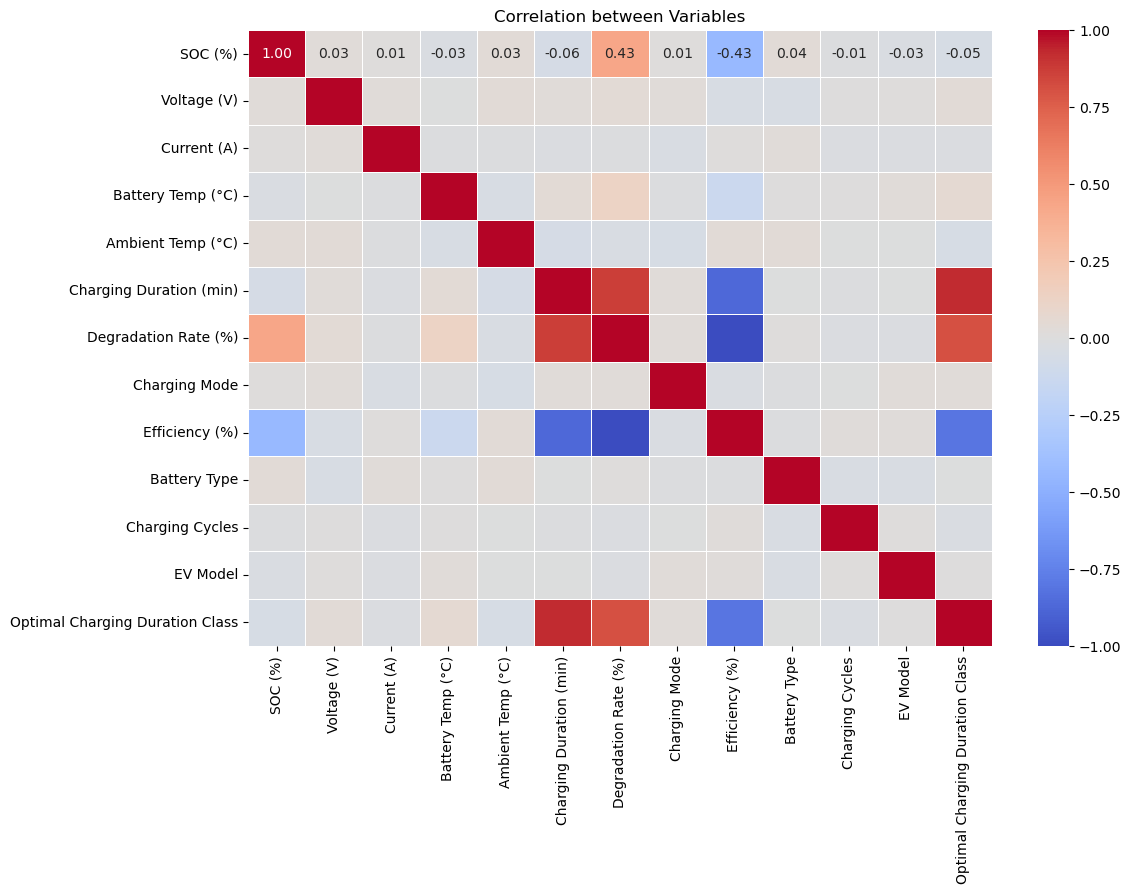

In [22]:
# Checking the correlation between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Variables')
plt.show()

In [23]:
X= df.drop(columns=['Efficiency (%)'])
y = df['Efficiency (%)']

In [24]:
X

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Charging Mode,Battery Type,Charging Cycles,EV Model,Optimal Charging Duration Class
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,0,0,112,1,1
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,0,1,398,0,1
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,2,1,175,0,2
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,0,1,150,1,1
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,0,0,886,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,18.242387,3.959869,87.876618,28.842141,32.947946,88.443536,9.724521,1,1,236,2,2
996,92.558222,4.169630,24.154589,26.688024,17.387620,70.322041,11.822482,1,1,957,0,1
997,22.313677,3.548271,37.880907,27.891446,21.556857,96.514885,10.553163,0,1,997,2,2
998,95.521362,3.539938,36.104098,30.598812,31.314908,68.529063,12.016764,1,1,435,1,1


In [25]:
y

0      98.238981
1      97.562628
2      97.233533
3      98.136225
4      97.662485
         ...    
995    98.055096
996    97.635504
997    97.889367
998    97.596647
999    98.684019
Name: Efficiency (%), Length: 1000, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:
print("Model Coefficients:", model.coef_)

Model Coefficients: [-9.88196541e-03  3.05214462e-15  1.96224461e-17 -9.88196541e-03
  7.25809340e-17 -1.64699424e-02 -2.36069174e-03  4.82085398e-17
  4.71021778e-16  8.33003754e-18  2.42053556e-16 -1.48749511e-16]


In [31]:
print("Intercept of the model:", model.intercept_)

Intercept of the model: 99.99999999999999


In [32]:
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 1.231885189593132e-28


In [33]:
print("R-square (R²):", r2)

R-square (R²): 1.0


In [34]:
Xnew = X_test.iloc[0].values.reshape(1, -1)
prediction = model.predict(Xnew)


In [35]:
Xnew = X_test.iloc[0].values.reshape(1, -1)

prediction = model.predict(Xnew)
print("Prediction of Xnew:", prediction[0])

Prediction of Xnew: 97.96778778478979
